# Use Random Forest to prepare a model on fraud data

# Importing Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_data.duplicated().sum()

0

In [7]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
corr=fraud_data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


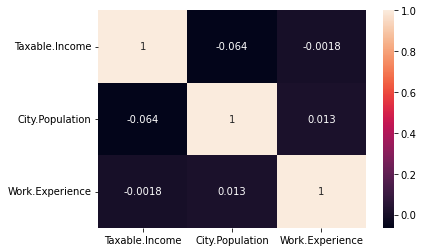

In [9]:
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


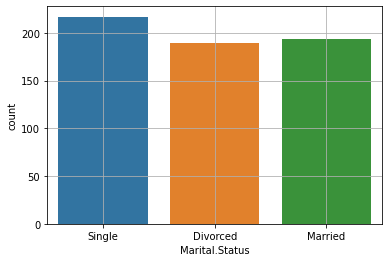

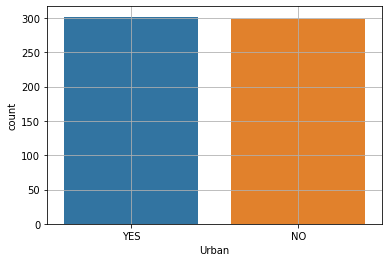

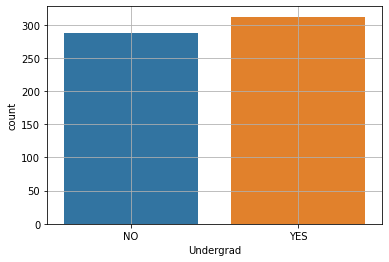

In [11]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [12]:
print('minimum_value : ' , fraud_data['Taxable.Income'].min() ,'\n maximun_value :',fraud_data['Taxable.Income'].max())

minimum_value :  10003 
 maximun_value : 99619


In [13]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
fraud_data['Taxable.Income'] = pd.cut(x=fraud_data['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
fraud_data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [14]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


C:\Users\Unique Web System\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


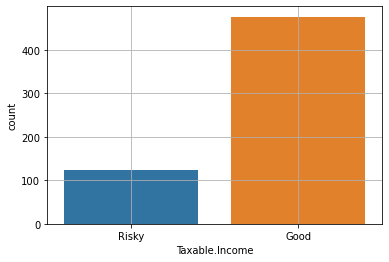

In [15]:
sns.countplot(fraud_data['Taxable.Income'])
plt.grid(True)
plt.show()

In [16]:
fraud_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [17]:
fraud_data = pd.get_dummies(fraud_data,columns = ["Taxable.Income"],drop_first=True)

In [18]:
fraud_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


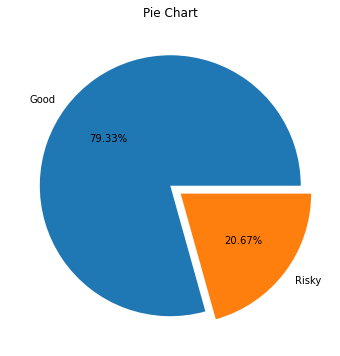

In [19]:
#subscription to the term deposit
plt.figure(figsize=(10,6))
plt.pie(fraud_data['Taxable.Income_Good'].value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart')
plt.show()

by piechart we say that our data is imbalanced. We have to take same percentage of 'Good' & 'Risky' in training and testing data.

In [21]:
#encoding categorical fraud_data
label_encoder = preprocessing.LabelEncoder()

fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Taxable.Income_Good'] = label_encoder.fit_transform(fraud_data['Taxable.Income_Good'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


# Data Preparation

In [22]:
X=fraud_data.drop('Taxable.Income_Good',axis=1)
y=fraud_data[['Taxable.Income_Good']]

# Spliting and Handling imbalanced data

In [24]:
# by using 'stratify=y' , we can deal with imbalanced data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 12,shuffle=True,stratify=y)

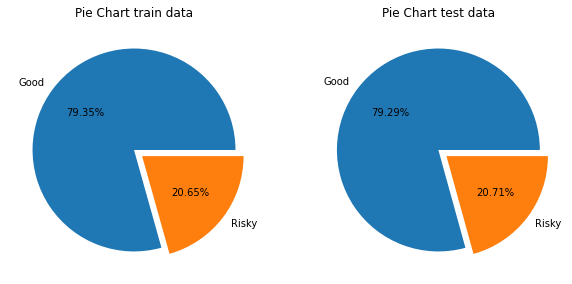

In [25]:
plt.figure(figsize=(10,6))
#train data 
ax1 = plt.subplot(121)
line1=plt.pie(y_train.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart train data')

#test data
ax2 = plt.subplot(122)
line2=plt.pie(y_test.value_counts(),labels=['Good','Risky'],explode=(0,0.1),autopct ='%1.2f%%')
plt.title('Pie Chart test data')
plt.show()

by observing above plots, we can say that in our training and testing data the percentage of 'Good' & 'Risky' are same as original dataset

In [26]:
print('X_train_shape :',X_train.shape,'\ny_train_shape',y_train.shape)

X_train_shape : (402, 5) 
y_train_shape (402, 1)


In [27]:
print('X_test_shape :',X_test.shape,'\ny_test_shape',y_test.shape)

X_test_shape : (198, 5) 
y_test_shape (198, 1)


# Model Building

In [28]:
rf_classifier = RandomForestClassifier(random_state=38)
rf_classifier.fit(X_train,y_train)

C:\Users\UNIQUE~1\AppData\Local\Temp/ipykernel_7756/593298316.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train,y_train)


RandomForestClassifier(random_state=38)

# Grid SearchCv

To check which criterion is best for our RandomForest Classifier and also which Max_depth is best for our RandomForest Classifier.

In [30]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_classifier,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

{'criterion': 'entropy', 'max_depth': 2}
0.7933333333333332


In [31]:
#new Model
rf_classifier_1 = RandomForestClassifier(criterion = 'entropy',random_state=38,max_depth=2)
rf_classifier_1.fit(X_train, y_train)

C:\Users\UNIQUE~1\AppData\Local\Temp/ipykernel_7756/995457025.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_1.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=2, random_state=38)

In [34]:
y_pred_train = rf_classifier_1.predict(X_train)

In [35]:
y_pred_test = rf_classifier_1.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [36]:
accuracy_score(y_train,y_pred_train)

0.7935323383084577

In [37]:
confusion_matrix(y_train,y_pred_train)

array([[  0,  83],
       [  0, 319]], dtype=int64)

In [38]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.79      1.00      0.88       319

    accuracy                           0.79       402
   macro avg       0.40      0.50      0.44       402
weighted avg       0.63      0.79      0.70       402



C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
accuracy_score(y_test,y_pred_test)

0.7929292929292929

In [40]:
confusion_matrix(y_test,y_pred_test)

array([[  0,  41],
       [  0, 157]], dtype=int64)

In [41]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.79      1.00      0.88       157

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Unique Web System\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
